Load the cleaned dataset.

In [30]:
import pandas as pd

badminton2_cleaned =  pd.read_csv('badmintondata2_cleaned_data.csv', header='infer')
badminton2_cleaned

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
0,4,1,10,40,1,4.076937,1.001343,2.662080
1,4,1,10,40,1,4.150607,1.002629,2.725872
2,4,1,10,40,1,4.227416,1.003970,2.787845
3,4,1,10,40,1,4.300908,1.005252,2.846121
4,4,1,10,40,1,4.376173,1.006566,2.905997
...,...,...,...,...,...,...,...,...
54330,4,4,10,60,50,7.153229,7.757872,6.312965
54331,4,4,10,60,50,7.182794,7.793107,6.328785
54332,4,4,10,60,50,7.213350,7.829521,6.345685
54333,4,4,10,60,50,7.248687,7.871634,6.358913


In [31]:
# Standardize dataset
from sklearn.preprocessing import StandardScaler

# Using the last three columns of csv data (3D coordinates of the shuttlecock point)
feature_matrix = badminton2_cleaned.drop(badminton2_cleaned.columns[-3:], axis=1)  # Feature Matrix 
target_coors = badminton2_cleaned[badminton2_cleaned.columns[-3:]]  # Target Coordinates 

# Standardizing the features (Standardize or No standardize -> train result will still be the same)
feature_matrix = StandardScaler().fit_transform(feature_matrix)

In [32]:
# To decide on the number of components
from sklearn.decomposition import PCA

# Use PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(feature_matrix)

pca_result = pd.DataFrame(pca_result,columns=['pc1','pc2','pc3','pc4'],index=range(1,54336))
pca_result

,pc1,pc2,pc3,pc4
1,-0.380251,1.646011,-1.710036,3.283168e-18
2,-0.380251,1.646011,-1.710036,-8.234131e-18
3,-0.380251,1.646011,-1.710036,1.440661e-15
4,-0.380251,1.646011,-1.710036,-1.569278e-19
5,-0.380251,1.646011,-1.710036,-1.569278e-19
...,...,...,...,...
54331,0.384335,-1.488342,1.884421,1.585066e-19
54332,0.384335,-1.488342,1.884421,1.585066e-19
54333,0.384335,-1.488342,1.884421,1.585066e-19
54334,0.384335,-1.488342,1.884421,1.585066e-19


[1.05290024e+00 1.00496213e+00 9.42192844e-01 3.82045667e-35]
3.0000552140463395
4


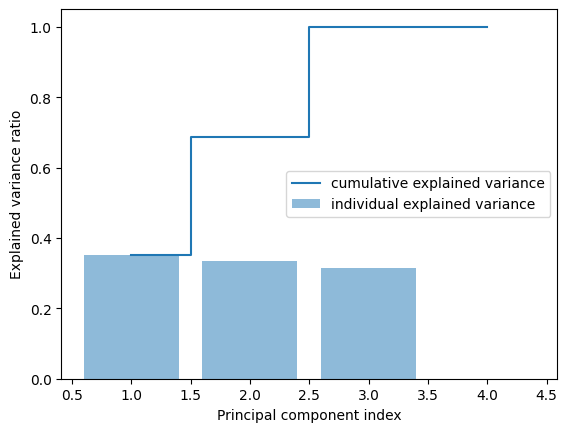

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate cumulative sum of explained variances
tot = sum(pca.explained_variance_)
print(pca.explained_variance_)
print(tot)
var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(len(var_exp))

# Plot explained variances
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

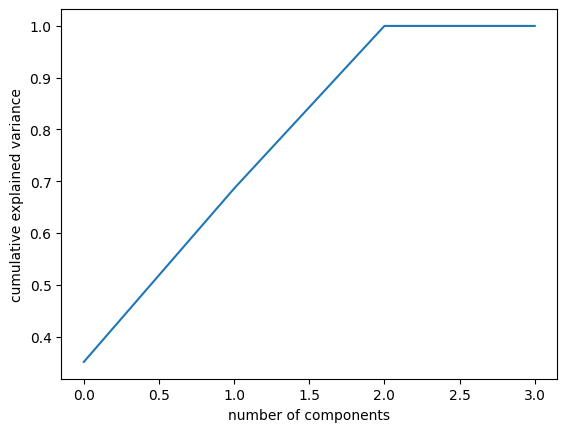

In [34]:
# Display the projected values with scatter plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

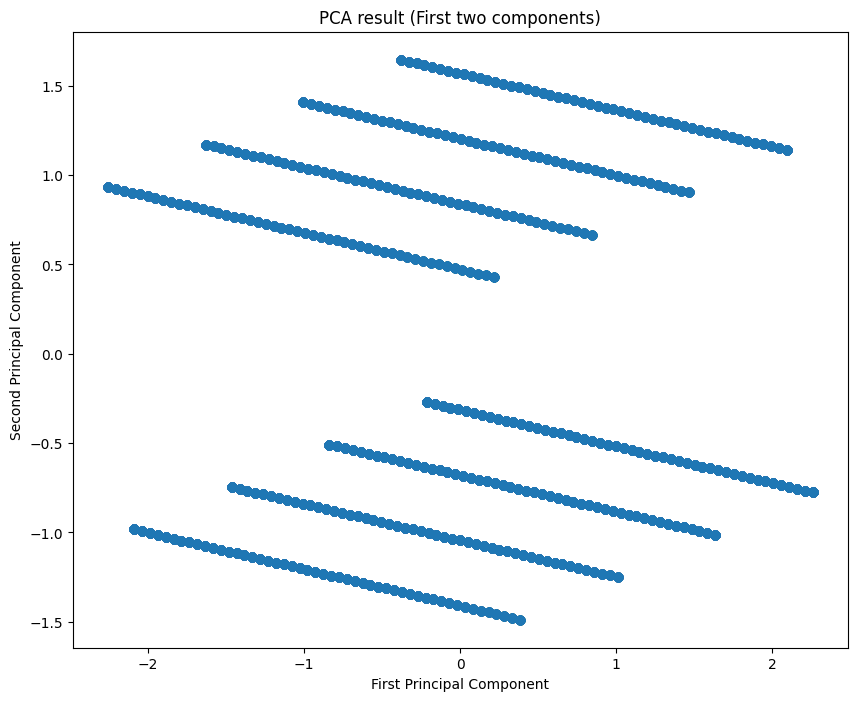

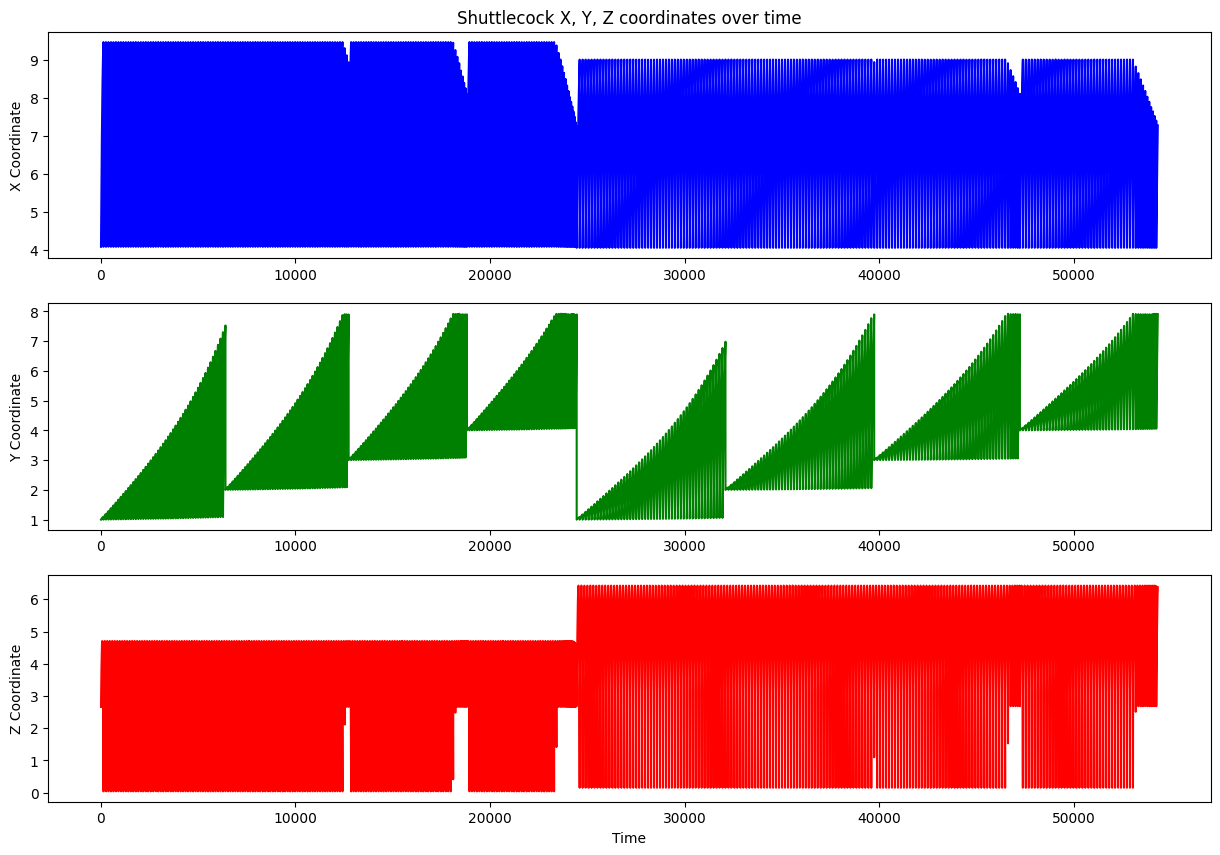

In [35]:
# Visualize the first two principal components
plt.figure(figsize=(10,8))
plt.scatter(pca_result.iloc[:, 0], pca_result.iloc[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA result (First two components)')
plt.show()

# To see how x, y, z coordinates are distributed
# Visualize x,y,z coordinates separately over time
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.plot(target_coors['SHUTTLECOCK POSITIION IN AIR(X ) metres'], label='x', color='blue')
plt.ylabel('X Coordinate')
plt.title('Shuttlecock X, Y, Z coordinates over time')

plt.subplot(3,1,2)
plt.plot(target_coors['SHUTTLECOCK POSITIION IN AIR(Y) metres'], label='y', color='green')
plt.ylabel('Y Coordinate')

plt.subplot(3,1,3)
plt.plot(target_coors['SHUTTLECOCK POSITIION IN AIR(Z) metres'], label='z', color='red')
plt.ylabel('Z Coordinate')

plt.xlabel('Time')
plt.show()
